In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import math
from IPython.display import HTML
import matplotlib.animation as animation

Image shape: (216, 256, 13, 25)
Mask shape: (216, 256, 13, 25)
Slice index: 6
Time index: 12


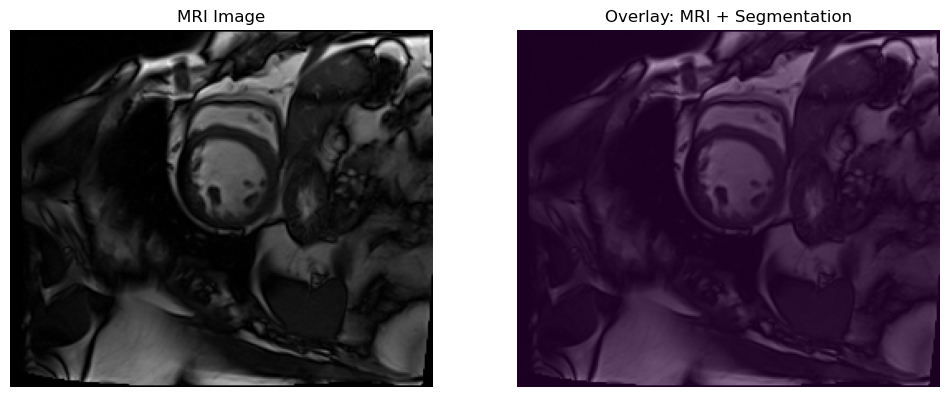

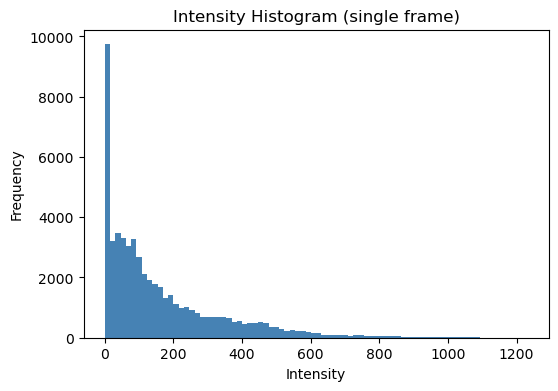

In [15]:
# ---- path to one case ----
case_path = r"C:\Users\29209\Desktop\Thesis\MEGA\OpenDataset\Training\Labeled\A0S9V9"
img_file = os.path.join(case_path, "A0S9V9_sa.nii.gz")
gt_file  = os.path.join(case_path, "A0S9V9_sa_gt.nii.gz")

# ---- load data ----
img = nib.load(img_file).get_fdata().astype(np.float32)
gt  = nib.load(gt_file).get_fdata().astype(np.int32)

print("Image shape:", img.shape)  # (H, W, Slices, Time)
print("Mask shape:", gt.shape)

# ---- pick slice and frame ----
slice_idx = img.shape[2] // 2      # middle slice
time_idx  = img.shape[3] // 2      # middle time frame

print("Slice index:", slice_idx)
print("Time index:", time_idx)

# ---- visualize ----
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("MRI Image")
plt.imshow(img[:, :, slice_idx, time_idx], cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Overlay: MRI + Segmentation")
plt.imshow(img[:, :, slice_idx, time_idx], cmap='gray')
plt.imshow(gt[:, :, slice_idx, time_idx], alpha=0.4)
plt.axis('off')

plt.show()

plt.figure(figsize=(6,4))
plt.title("Intensity Histogram (single frame)")
plt.hist(img[:, :, slice_idx, time_idx].flatten(), bins=80, color='steelblue')
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()

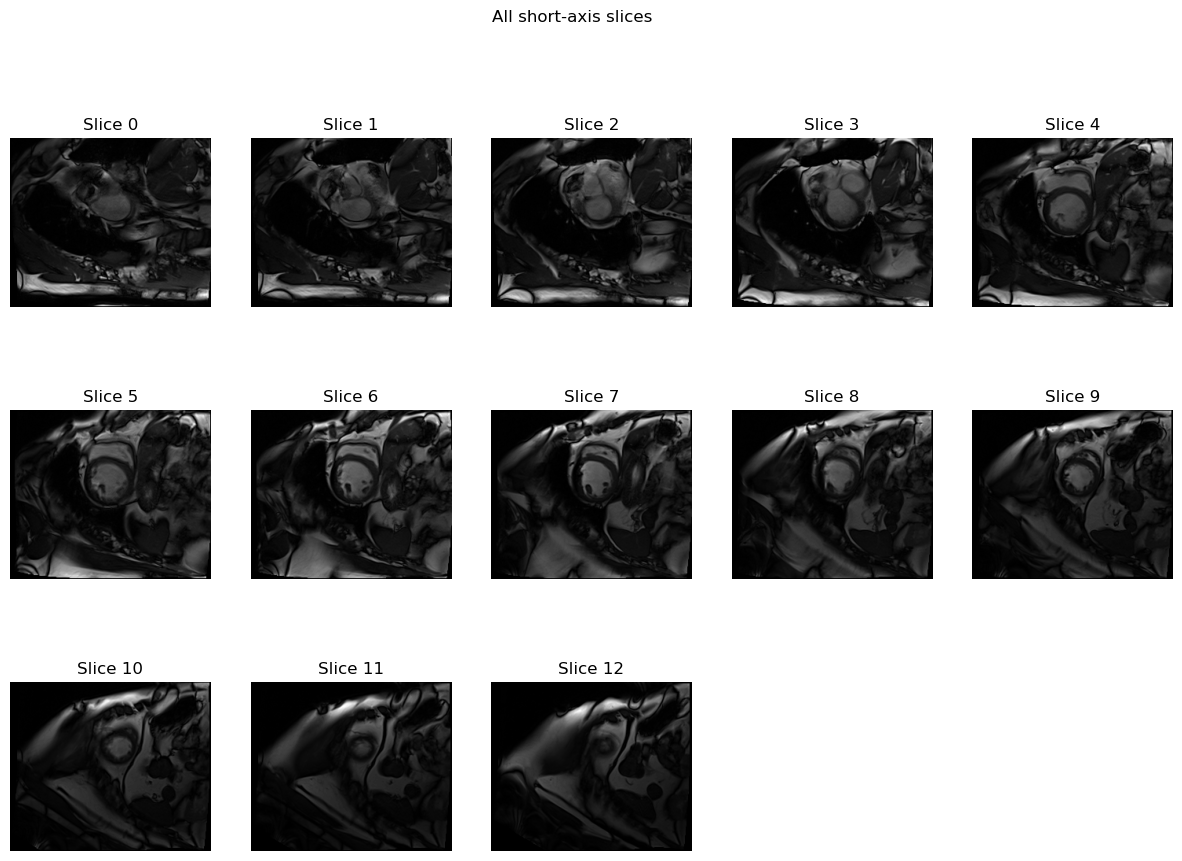

In [17]:
num_slices = img.shape[2]
cols = 5
rows = math.ceil(num_slices / cols)

plt.figure(figsize=(15, 10))
for i in range(num_slices):
    plt.subplot(rows, cols, i+1)
    plt.imshow(img[:, :, i, time_idx], cmap='gray')
    plt.title(f"Slice {i}")
    plt.axis('off')

plt.suptitle("All short-axis slices")
plt.show()

In [19]:
fig = plt.figure(figsize=(5,5))
ims = []

for t in range(img.shape[3]):
    im = plt.imshow(img[:, :, slice_idx, t], animated=True, cmap='gray')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=80, blit=True)
plt.close()
HTML(ani.to_jshtml())

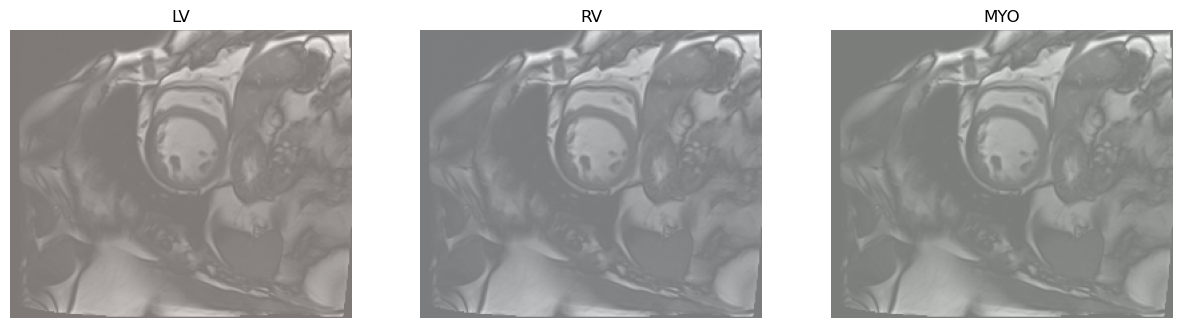

In [21]:
LV  = (gt[:, :, slice_idx, time_idx] == 1).astype(np.float32)
RV  = (gt[:, :, slice_idx, time_idx] == 2).astype(np.float32)
MYO = (gt[:, :, slice_idx, time_idx] == 3).astype(np.float32)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("LV")
plt.imshow(img[:, :, slice_idx, time_idx], cmap='gray')
plt.imshow(LV, alpha=0.5, cmap='Reds')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("RV")
plt.imshow(img[:, :, slice_idx, time_idx], cmap='gray')
plt.imshow(RV, alpha=0.5, cmap='Blues')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("MYO")
plt.imshow(img[:, :, slice_idx, time_idx], cmap='gray')
plt.imshow(MYO, alpha=0.5, cmap='Greens')
plt.axis('off')

plt.show()